In [1]:
import attrs
import numpy as np
from matplotlib import pyplot as plt

from hetero.algo import BetaOptimizer, MCPImpl
from hetero.config import DTYPE, AlgoConfig, DataGenConfig, GroupingConfig
from hetero.datagen import generate_data_from_config
from hetero.policies import AlternativePolicy
from hetero.tasks import (
    beta_estimate_from,
    beta_estimate_from_e2e_learning,
    beta_estimate_from_nongrouped,
    compute_UV_truths,
    compute_V_estimate,
)

=====================================================================================================

In [22]:
# Setting following two coeffs to same values for both groups to simulate the homogeneous case.

group_reward_coeff = np.array(
    [
        [2, -2, -2, 2],
        [2, -2, -2, 2],
    ],
    dtype=DTYPE,
)

action_reward_coeff = [1, 1]

FEATURE_TYPE = "LEGENDRE"
TRANS = "NORMCDF"
NOISE = "STUDENT"

data_config_init = dict(
    num_trajectories=100,
    num_time_steps=40,
    group_reward_coeff_override=group_reward_coeff,
    action_reward_coeff=action_reward_coeff,
    num_burnin_steps=100,
    basis_expansion_method=FEATURE_TYPE,
    transformation_method=TRANS,
    add_intercept_column=True,
    noise_type=NOISE,
    noise_student_degree=4,
)


data_config = DataGenConfig(**data_config_init)


new_labels.length=8000 matches number of records


In [28]:
# Trial Two

In [55]:
algo_config_init = dict(
    discount=0.6,
    max_num_iters=10,
    gam=2.7,
    #should_remove_outlier=True,
    #outlier_lower_perc=2,
    #outlier_upper_perc=98,
    nu_coeff=1e-6,         
    delta_coeff=1e-6,
    use_group_wise_regression_init=True,
)

data = generate_data_from_config(data_config)

pi_eval = AlternativePolicy(data.num_actions())

beta_nongrouped = beta_estimate_from_nongrouped(
    data, pi_eval, algo_config_init["discount"]
)
lam_to_beta = {}

lam_list = [3.0, 2.0, 1.5]
#rho_list = [30, 25, 10]
rho_list = [10, 2, 2]

lam_to_rho = {k:v for k, v in zip(lam_list, rho_list)}

for lam, rho in zip(lam_list, rho_list):
    print(f"+++++ lam = {lam}, rho = {rho} +++++")
    algo_config = AlgoConfig(lam=lam, rho=rho, **algo_config_init)
    impl = MCPImpl(data.N(), algo_config)
    beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
    lam_to_beta[algo_config.lam] = beta_opt.compute()
    

new_labels.length=8000 matches number of records
+++++ lam = 3.0, rho = 10 +++++
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=1081, num_below=18819
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19699, num_below=201
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=13579, num_below=6321
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=9746, num_below=10154
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=13264, num_below=6636
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=6509, num_below=13391
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=18244, num_below=1656
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=7947, num_below=11953
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=17752, num_below=2148
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=9465, num_below=10435


<Figure size 640x480 with 0 Axes>

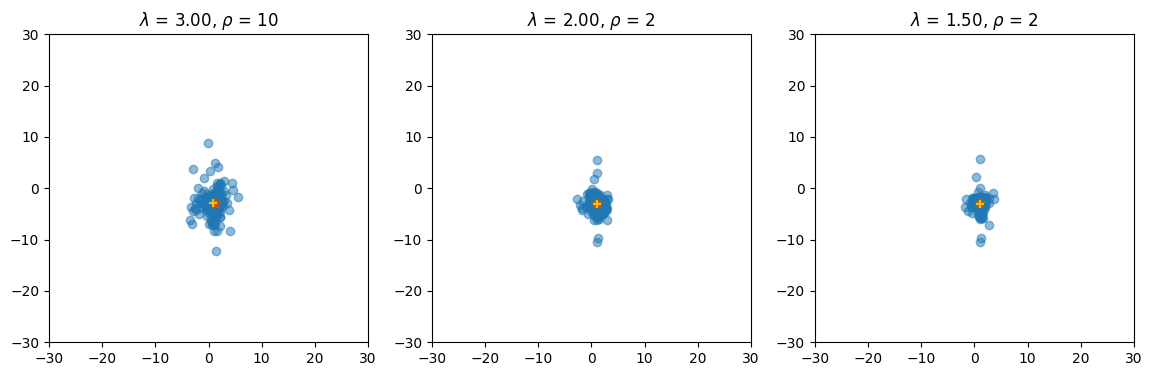

In [57]:
xlim = [-30, 30]
ylim = [-30, 30]

plt.set_cmap('tab20')
fig, axs = plt.subplots(1, 3, figsize=[14, 4])

for i, lam in enumerate(sorted(lam_to_beta.keys(), reverse=True)):
    beta = lam_to_beta[lam]
    rho = lam_to_rho[lam]
    beta_mean = beta.mean(axis=0)

    axs[i].scatter(
        beta[:, 0], 
        beta[:, 1], 
        alpha=0.5)
    axs[i].scatter(
        beta_nongrouped.betas[0][0],
        beta_nongrouped.betas[0][1],
        c='#D35400', # red
        s=60,
        marker="*",
    )
    axs[i].scatter(
        beta_mean[0], 
        beta_mean[1], 
        c='#F1C40F',  # yellow
        s=30,
        marker="+")
    
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_title(f"$\\lambda$ = {lam:0.2f}, $ \\rho$ = {rho}")
    
#plt.savefig(f'results/mdp_homo_legendre.pdf', bbox_inches='tight')
plt.show()

In [29]:
# Trial One 

In [24]:
algo_config_init = dict(
    discount=0.6,
    max_num_iters=10,
    gam=2.7,
    #should_remove_outlier=True,
    #outlier_lower_perc=2,
    #outlier_upper_perc=98,
    nu_coeff=1e-6,         
    delta_coeff=1e-6,
    use_group_wise_regression_init=True,
)

data = generate_data_from_config(data_config)

pi_eval = AlternativePolicy(data.num_actions())

beta_nongrouped = beta_estimate_from_nongrouped(
    data, pi_eval, algo_config_init["discount"]
)

lam_to_beta = {}
lam_list = [2, 1.5, 0.5]
rho_list = [50, 25, 10]

for lam, rho in zip(lam_list, rho_list):
    print(f"+++++ lam = {lam}, rho = {rho} +++++")
    algo_config = AlgoConfig(lam=lam, rho=rho, **algo_config_init)
    impl = MCPImpl(data.N(), algo_config)
    beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
    lam_to_beta[algo_config.lam] = beta_opt.compute()

+++++ lam = 2, rho = 50 +++++
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=4991, num_below=14909
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=19857, num_below=43
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=19793, num_below=107
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=19580, num_below=320
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=18900, num_below=1000
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=16605, num_below=3295
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=14024, num_below=5876
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=17466, num_below=2434
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=11820, num_below=8080
beta_solver, min eigen of left matrix = (0.11768786+0j)
MCPImpl: num_above=18730, num_below=1170
++++

<Figure size 640x480 with 0 Axes>

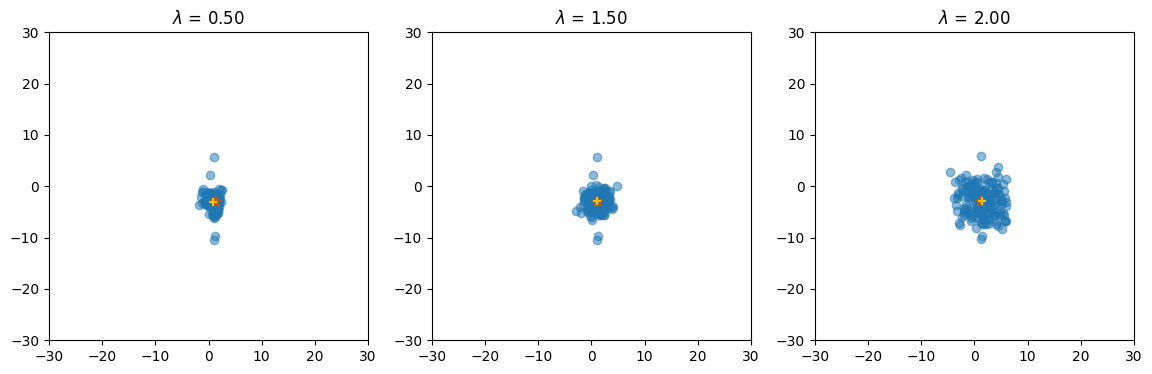

In [27]:
xlim = [-30, 30]
ylim = [-30, 30]

plt.set_cmap('tab20')
fig, axs = plt.subplots(1, 3, figsize=[14, 4])

for i, lam in enumerate(sorted(lam_to_beta.keys())):
    beta = lam_to_beta[lam]
    beta_mean = beta.mean(axis=0)

    axs[i].scatter(
        beta[:, 0], 
        beta[:, 1], 
        alpha=0.5)
    axs[i].scatter(
        beta_nongrouped.betas[0][0],
        beta_nongrouped.betas[0][1],
        c='#D35400', # red
        s=60,
        marker="*",
    )
    axs[i].scatter(
        beta_mean[0], 
        beta_mean[1], 
        c='#F1C40F',  # yellow
        s=30,
        marker="+")
    
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_title(f"$\lambda$ = {lam:0.2f}")

# Previous

In [ ]:
lam_to_beta = {}

In [3]:
algo_config = AlgoConfig(lam=1, rho=50, **algo_config_init)
impl = MCPImpl(data.N(), algo_config)
beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
lam_to_beta[algo_config.lam] = beta_opt.compute()

beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=17880, num_below=2020
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=16242, num_below=3658
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=14254, num_below=5646
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=13459, num_below=6441
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=16281, num_below=3619
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=14369, num_below=5531
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=12400, num_below=7500
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=16117, num_below=3783
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=14206, num_below=5694
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=11761, num_below=8139


In [4]:
algo_config = AlgoConfig(lam=0.75, rho=10, **algo_config_init)
impl = MCPImpl(data.N(), algo_config)
beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
lam_to_beta[algo_config.lam] = beta_opt.compute()

beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19382, num_below=518
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19285, num_below=615
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19166, num_below=734
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19083, num_below=817
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=18994, num_below=906
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=18902, num_below=998
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=18810, num_below=1090
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=18711, num_below=1189
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=18589, num_below=1311
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=18471, num_below=1429


In [5]:
algo_config = AlgoConfig(lam=0.5, rho=5, **algo_config_init)
impl = MCPImpl(data.N(), algo_config)
beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
lam_to_beta[algo_config.lam] = beta_opt.compute()

beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19852, num_below=48
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19879, num_below=21
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19852, num_below=48
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19879, num_below=21
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19851, num_below=49
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19879, num_below=21
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19851, num_below=49
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19879, num_below=21
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19851, num_below=49
beta_solver, min eigen of left matrix = 0.48847613
MCPImpl: num_above=19879, num_below=21


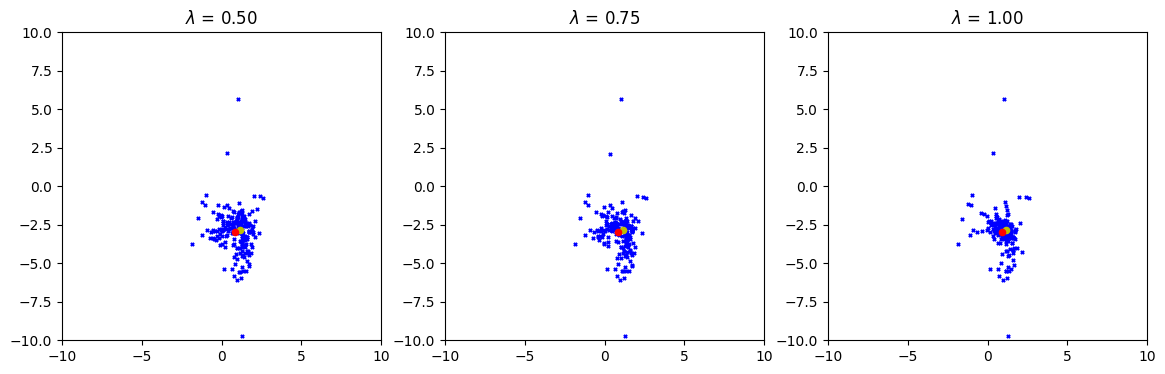

In [7]:
xlim = [-10, 10]
ylim = [-10, 10]

fig, axs = plt.subplots(1, 3, figsize=[14, 4])
for i, lam in enumerate(sorted(lam_to_beta.keys())):
    beta = lam_to_beta[lam]
    beta_mean = beta.mean(axis=0)

    axs[i].scatter(beta[:, 0], beta[:, 1], s=5, c="b", marker="x")
    axs[i].scatter(
        beta_nongrouped.betas[0][0],
        beta_nongrouped.betas[0][1],
        s=20,
        c="y",
        marker="o",
    )
    axs[i].scatter(beta_mean[0], beta_mean[1], s=20, c="r", marker="o")
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_title(f"$\lambda$ = {lam:0.2f}")